In [1]:
# Libraries Using
import pandas as pd
import numpy as np

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
# Importing and Exploring the Dataset
data = pd.read_csv('/kaggle/input/tripadvisor-reviews-2023/New_Delhi_reviews.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147581 entries, 0 to 147580
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   rating_review  147581 non-null  int64 
 1   review_full    147579 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.3+ MB


In [3]:
# Checking for NULL values
data.isnull().sum()

rating_review    0
review_full      2
dtype: int64

In [4]:
data[data.isnull().any(axis = 1)]

,rating_review,review_full
79882,3,NaN
141165,5,NaN


In [5]:
# Removing the NULL values from the Dataset
data.dropna(inplace = True)
data.isnull().sum()

rating_review    0
review_full      0
dtype: int64

In [6]:
data['review_full'].sample(2)

32742    Kake Da dhabha, is well known restaurant for P...
21356    If you time your visit well--then you will get...
Name: review_full, dtype: object

In [7]:
# Converting the 'review_full' column values into lowercase
data['review_full'] = data['review_full'].str.lower()
data['review_full']

0         totally in love with the auro of the place, re...
1         i went this bar 8 days regularly with my husba...
2         we were few friends and was a birthday celebra...
3         fatjar cafe and market is the perfect place fo...
4         hey guys, if you are craving for pizza and sea...
                                ...                        
147576    near by airport very calm and cool environment...
147577    my favourite place to stay. great service. ash...
147578    good food with nice decoration, drinks list al...
147579    near to airport .it is fine property.  staff i...
147580    amazing food ..  excellent ambience ..  great ...
Name: review_full, Length: 147579, dtype: object

In [8]:
# Checking for Duplicated Values in the Column
data[data.duplicated()].count()

rating_review    137
review_full      137
dtype: int64

In [9]:
data.drop_duplicates(inplace = True)

In [10]:
data[data.duplicated()].count()

rating_review    0
review_full      0
dtype: int64

In [11]:
# Final Cleaned Dataset Shape
data.shape

(147442, 2)

In [12]:
data['rating_review'].value_counts()

5    72316
4    50204
3    15924
2     4549
1     4449
Name: rating_review, dtype: int64

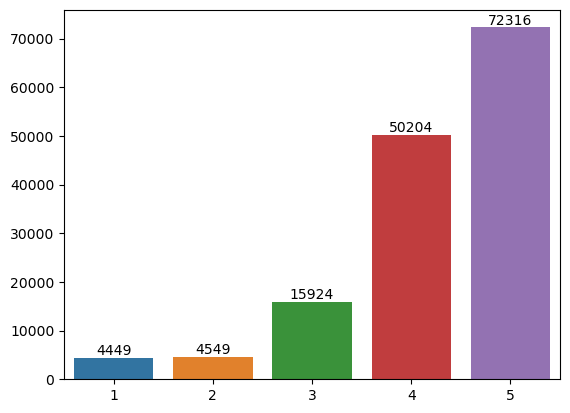

In [13]:
# Distribution of Ratings from 5 to 1
ax = sns.barplot(data, x = data['rating_review'].value_counts().index, y = data['rating_review'].value_counts().values)
for labels in ax.containers:
    ax.bar_label(labels)

In [14]:
one_rating  = (data['rating_review'].value_counts().values[4] * 100 / data['rating_review'].count()).round(2)
two_rating  = (data['rating_review'].value_counts().values[3] * 100 / data['rating_review'].count()).round(2)
three_rating  = (data['rating_review'].value_counts().values[2] * 100 / data['rating_review'].count()).round(2)
four_rating  = (data['rating_review'].value_counts().values[1] * 100 / data['rating_review'].count()).round(2)
five_rating  = (data['rating_review'].value_counts().values[0] * 100 / data['rating_review'].count()).round(2)

print('1 Star Rating Distribution: ', one_rating,'%')
print('2 Star Rating Distribution: ', two_rating,'%')
print('3 Star Rating Distribution: ', three_rating,'%')
print('4 Star Rating Distribution: ', four_rating,'%')
print('5 Star Rating Distribution: ', five_rating,'%')

1 Star Rating Distribution:  3.02 %
2 Star Rating Distribution:  3.09 %
3 Star Rating Distribution:  10.8 %
4 Star Rating Distribution:  34.05 %
5 Star Rating Distribution:  49.05 %


In [15]:
sia = SentimentIntensityAnalyzer()

In [16]:
def get_sentiment(text):
    sentiment = sia.polarity_scores(text)
    if sentiment['compound'] >= 0.05:
        return 'Positive'
    elif sentiment['compound'] <= 0.05:
        return 'Negative'
    else:
        return 'Neutral'
    
data['sentiment'] = data['review_full'].apply(get_sentiment)

In [17]:
data.sample(4)

,rating_review,review_full,sentiment
146064,4,very good breakfast spread. definitely recomme...,Positive
38181,4,this is a modern eatery. it functions like a f...,Positive
129882,4,it is the best south indian chain in india. in...,Positive
40353,4,"delicious food, nice cold beer, friendly staff...",Positive


In [18]:
data['sentiment'].value_counts()

Positive    135181
Negative     12261
Name: sentiment, dtype: int64

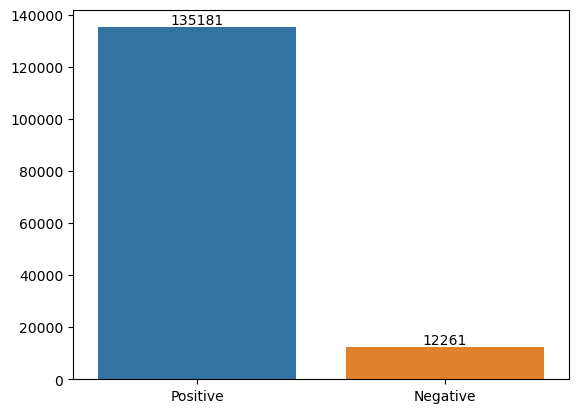

In [19]:
# Plotting the Sentiment Distribution
ax = sns.barplot(data, x = data['sentiment'].value_counts().index, y = data['sentiment'].value_counts().values)

for labels in ax.containers:
    ax.bar_label(labels)

In [20]:
positive_review = (data['sentiment'].value_counts().values[0] / data['sentiment'].count()).round(3) * 100
negative_review = (data['sentiment'].value_counts().values[1] / data['sentiment'].count()).round(3) * 100

print('Positive Review Percentage:', positive_review,'%')
print('Negative Review Percentage:', negative_review,'%')

Positive Review Percentage: 91.7 %
Negative Review Percentage: 8.3 %


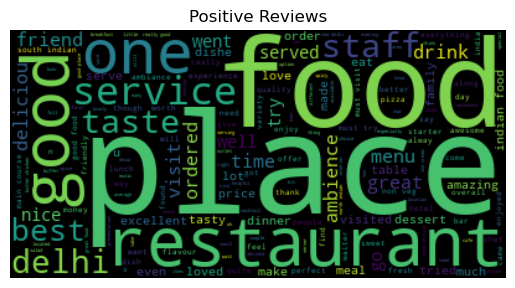

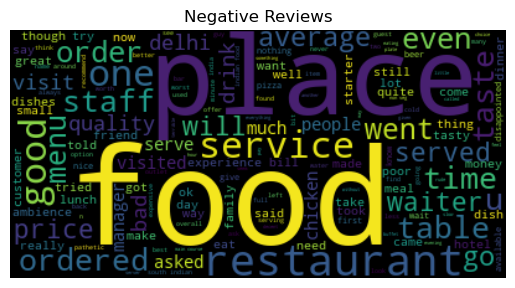

In [21]:
from wordcloud import WordCloud

positive_reviews = ' '.join(data[data['sentiment'] == 'Positive']['review_full'])
negative_reviews = ' '.join(data[data['sentiment'] == 'Negative']['review_full'])

positive_wordcloud = WordCloud().generate(positive_reviews)
negative_wordcloud = WordCloud().generate(negative_reviews)

plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Positive Reviews')
plt.show()

plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Negative Reviews')
plt.show()

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [23]:
X = tfidf.fit_transform(data['review_full'])
y = data['sentiment']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

In [24]:
regression = LogisticRegression(solver = 'saga')

In [25]:
regression.fit(X_train, y_train)

LogisticRegression(solver='saga')

In [26]:
predictions = regression.predict(X_test)

In [27]:
accuracy_score(y_test, predictions).round(3)

0.944